# W261 course notes
## Week 1: 8/31/2016
### Reading

*Doing Data Science (ch 1 and 2)*
* “Datify” all the things to maximize value
* Data science pipeline

*The human face of big data: Rick Smolan*
* Big data is like opening 1000s of more eyes. You can see dimensions you couldn’t see before. 
* Data that is garbage to some people are gold to others

*[Model selection](https://theclevermachine.wordpress.com/2013/04/21/model-selection-underfitting-overfitting-and-the-bias-variance-tradeoff/)*
* Bias-variance tradeoff. Bias = consistently get a prediction wrong. Variance = inconsistently make a prediction.

<IPython.core.display.Javascript object>


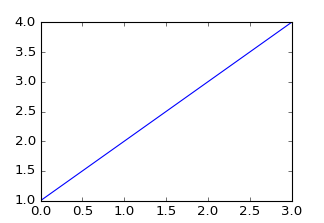

In [4]:
# Use this for interactive plots
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd

pd.Series([1,2,3,4]).plot()

When asking the professor a question, use the STAR approach: Situation, Task, Action, Result.

### Lectures

You must participate in the online Google group to get full participation credit.



## Week 2: 9/7/2016
### HW counts towards grade


## Week 3: 9/14/2016



## Week 4: 9/21/2016



## Week 5: 9/28/2016
### HW counts towards grade


## Week 6: 10/5/2016



## Week 7: 10/12/2016



## Week 8: 10/19/2016 [EXAM week]



## Week 9:  10/26/2016
### HW counts towards grade


## Week 10: 11/2/2016



## Week 11: 11/9/2016



## Week 12: 11/16/2016



## Week 13: 11/23/2016



## Week 14: 11/30/2016 [EXAM week]



## Week 15: 12/7/2016